In [1]:
import cv2
import numpy as np
import os

import datetime
from skimage import io
import random
import matplotlib.pyplot as plt
% matplotlib inline
import glob

UsageError: Line magic function `%` not found.


In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam

def create_model(optimizer, learning_rate):
    model = Sequential()
    # ... (Same as your existing model)
    # first conv layer
    # input shape = (img_rows, img_cols, 1)
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # second conv layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # flatten and put a fully connected layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # fully connected
    model.add(Dropout(0.5))

    # softmax layer
    model.add(Dense(6, activation='softmax'))

    # Compile the model with the provided optimizer and learning rate
    optimiser = optimizer(learning_rate=learning_rate)
    model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

Using TensorFlow backend.


In [3]:
# Loading the Dataset

DATASET_PATH = '/kaggle/input/hand-gesture-recog-dataset/data'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path

['/kaggle/input/hand-gesture-recog-dataset/data/five',
 '/kaggle/input/hand-gesture-recog-dataset/data/thumbsdown',
 '/kaggle/input/hand-gesture-recog-dataset/data/ok',
 '/kaggle/input/hand-gesture-recog-dataset/data/blank',
 '/kaggle/input/hand-gesture-recog-dataset/data/fist',
 '/kaggle/input/hand-gesture-recog-dataset/data/thumbsup']

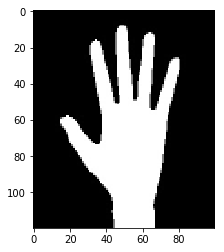

In [4]:
import cv2
image = cv2.imread('/kaggle/input/hand-gesture-recog-dataset/data/five/hand1(1015).jpg')
image = cv2.resize(image,(100, 120))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [5]:
import glob

loaded_images = []
outputVectors = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']
num_images_per_gesture = 1600
image_size = (100, 120)

for gesture_index, gesture_name in enumerate(list_of_gestures):
    dataset_path = "/kaggle/input/hand-gesture-recog-dataset/data/" + str(gesture_name)
    gesture_path = os.path.join(dataset_path, '*')
    gest_path = glob.glob(gesture_path)
    
    for image_path in gest_path[:num_images_per_gesture]:
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.resize(gray_image, image_size)
        loaded_images.append(gray_image)
        
        # Create output vectors
        output_vector = [0] * len(list_of_gestures)
        output_vector[gesture_index] = 1
        outputVectors.append(output_vector)

print("Number of loaded images:", len(loaded_images))
print("Number of output vectors:", len(outputVectors))

Number of loaded images: 9600
Number of output vectors: 9600


In [6]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)

(9600, 120, 100)
(9600, 6)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)

(7680, 100, 120, 1)
(1920, 100, 120, 1)


In [8]:
optimizers = [keras.optimizers.SGD, keras.optimizers.Adam, keras.optimizers.RMSprop]
learning_rates = [0.001, 0.01, 0.1]

results = {}  # To store results

for optimizer in optimizers:
    for lr in learning_rates:
        model = create_model(optimizer, lr)

        history = model.fit(X_train, y_train,
                            batch_size=128,
                            epochs=10,
                            verbose=0,
                            validation_data=(X_test, y_test))

        # Store the training history for analysis
        key = f"{optimizer.__name__}_lr_{lr}"
        results[key] = history


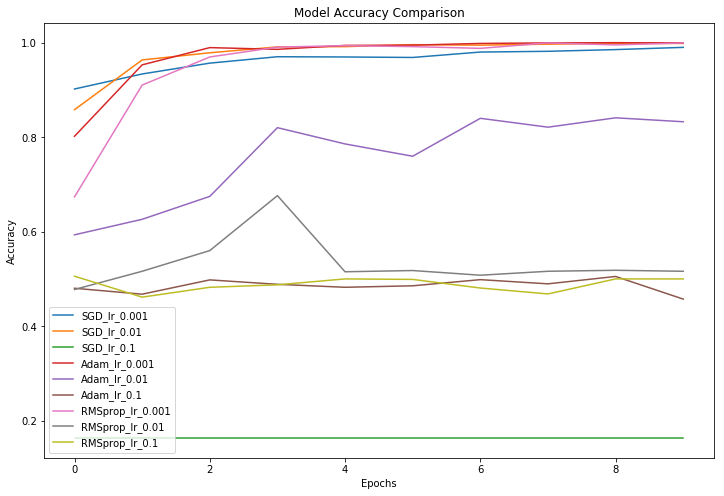

In [9]:
# Plotting the results
plt.figure(figsize=(12, 8))

for key, history in results.items():
    plt.plot(history.history['val_categorical_accuracy'], label=key)

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
for key, history in results.items():
    print(max(history.history['val_categorical_accuracy']), key)

0.9901041388511658 SGD_lr_0.001
0.9984375238418579 SGD_lr_0.01
0.1640625 SGD_lr_0.1
1.0 Adam_lr_0.001
0.8411458134651184 Adam_lr_0.01
0.5057291388511658 Adam_lr_0.1
0.9994791746139526 RMSprop_lr_0.001
0.676562488079071 RMSprop_lr_0.01
0.5062500238418579 RMSprop_lr_0.1
